In [3]:
from moviepy.editor import *
## generate circle

import gizeh
import moviepy.editor as mpy

W,H = 256,256 # width, height, in pixels
duration = 2 # duration of the clip, in seconds

def make_frame(t):
    surface = gizeh.Surface(W,H,bg_color=(1,1,1,1))
    radius = W*(0.1+ (t*(duration-t))**2 )/6
    circle = gizeh.circle(radius, xy = (W/2.5,H/2.5), fill=(1,0,0,1))
    circle.draw(surface)
    
    radius = W*(0.1+ (t*(duration-t))**2 )/6
    circle = gizeh.circle(radius, xy = (W/1.5,H/2.5), fill=(0,1,0,1))
    circle.draw(surface)
    
    
    radius = W*(0.1+ (t*(duration-t))**2 )/6
    circle = gizeh.circle(radius, xy = (W/1.9,H/1.5), fill=(0,0,1,1))
    circle.draw(surface)
    
    return surface.get_npimage()

clip = mpy.VideoClip(make_frame, duration=duration)


clip.write_gif("my1111.gif",fps=20, opt="OptimizePlus", fuzz=10 )

MoviePy - Building file my1111.gif with imageio.


In [9]:
from PIL import Image

string = 'test'
img = Image.open("test.gif")
try:
    flag = 0
    while True:
        #获取每一帧
        img.seek(flag) 
        #保存
        img.save(string+"/{}.png".format(flag))
        pic = Image.open(string+"/{}.png".format(flag))
        #转化
        pic = pic.convert("RGBA")
        #替换背景为透明
#         color = pic.getpixel((0,0))
        color = (0, 0, 0, 255)
        
        
        for i in range(pic.size[0]):
            
             for j in range(pic.size[1]):
                dot = (i,j)
                rgba = pic.getpixel(dot)
                if rgba == color:
                    rgba = rgba[:-1] + (0,)
                    pic.putpixel(dot, rgba)
         #保存
        pic.save(string+"/{}.png".format(flag))
        flag +=1
except BaseException as e:
    print(e)
    pass

no more images in GIF file


In [10]:
from PIL import Image
import os
photo_list = []
#获取保存的PNG图像
pic_list = os.listdir(string+"/")
#对图像List排序，防止图像位置错乱
pic_list.sort(key=lambda x:int(x[:-4]))
for k in pic_list:
    pic_p = Image.open(string+"/{}".format(k))
    photo_list.append(pic_p)
#保存图像，disposal可以为2或者3，但是不能为1或0，切记，其他自定义未尝试
photo_list[0].save(string+".gif", save_all=True, append_images=photo_list[1:],duration=40,transparency=0,loop=0,disposal=3)

In [ ]:
### 


import numpy as np
import gizeh
import moviepy.editor as mpy

W,H = 128,128
duration = 2
ncircles = 20 # Number of circles

def make_frame(t):

    surface = gizeh.Surface(W,H)

    for i in range(ncircles):
        angle = 2*np.pi*(1.0*i/ncircles+t/duration)
        center = W*( 0.5+ gizeh.polar2cart(0.1,angle))
        circle = gizeh.circle(r= W*(1.0-1.0*i/ncircles),
                              xy= center, fill= (i%2,i%20,i%2))
        circle.draw(surface)

    return surface.get_npimage()

clip = mpy.VideoClip(make_frame, duration=duration)
clip.write_gif("circles2.gif",fps=20, opt="OptimizePlus", fuzz=10)

In [31]:
from moviepy.editor import *
## generate circle

import gizeh
import moviepy.editor as mpy

arr = []
W,H = 512,1024 # width, height, in pixels
duration = 1 # duration of the clip, in seconds

def make_frame(t):
    alpha = (t*(duration-t))*4*0.6+0.2
    arr.append(alpha)
    surface = gizeh.Surface(W,H,bg_color=(0,0,0,1))

    square = gizeh.square(l=1024, fill=(1,0,0,alpha), xy = (W/2,H/2))    
    
    square.draw(surface)
    
    return surface.get_npimage()

clip = mpy.VideoClip(make_frame, duration=duration)


clip.write_gif("test.gif",fps=20, opt="OptimizePlus", fuzz=10 )

MoviePy - Building file test.gif with imageio.


In [33]:
arr

[0.2,
 0.2,
 0.314,
 0.41600000000000004,
 0.506,
 0.5840000000000001,
 0.6499999999999999,
 0.704,
 0.746,
 0.776,
 0.794,
 0.8,
 0.794,
 0.776,
 0.746,
 0.704,
 0.6499999999999999,
 0.584,
 0.5059999999999999,
 0.4159999999999999,
 0.31399999999999983]

In [34]:
final_clip = concatenate_videoclips([clip,clip,clip,clip,clip,clip,clip,clip])
final_clip = concatenate_videoclips([final_clip,final_clip,final_clip,final_clip,final_clip])
final_clip.write_videofile("test.mp4", fps=30) # export as video

Moviepy - Building video test.mp4.
Moviepy - Writing video test.mp4



Moviepy - Done !
Moviepy - video ready test.mp4


In [12]:
clip.write_videofile("test.mp4", fps=30) # export as video

Moviepy - Building video test.mp4.
Moviepy - Writing video test.mp4



Moviepy - Done !
Moviepy - video ready test.mp4


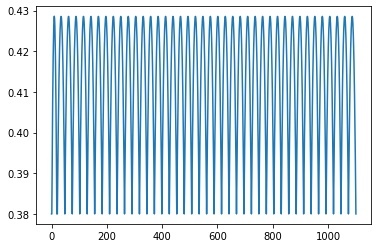

In [20]:
import matplotlib.pyplot as plt

arr_ = [i*0.6 + 0.3 for  i in arr]

plt.plot(arr_)

[0,
 0.0,
 0.0475,
 0.09000000000000001,
 0.1275,
 0.16000000000000003,
 0.1875,
 0.21000000000000002,
 0.22749999999999998,
 0.24,
 0.24750000000000003,
 0.25,
 0.2475,
 0.24,
 0.22749999999999998,
 0.20999999999999996,
 0.1875,
 0.15999999999999998,
 0.12749999999999995,
 0.08999999999999998,
 0.04749999999999994]

In [37]:
# Import everything needed to edit video clips
from moviepy.editor import *

# Load myHolidays.mp4 and select the subclip 00:00:50 - 00:00:60
clip = VideoFileClip("1.mp4").subclip(3,12)

In [39]:
clip.write_videofile("a.mp4")

chunk: 100%|█████████▉| 220/221 [00:37<00:00, 561.26it/s, now=None]

Moviepy - Building video a.mp4.
MoviePy - Writing audio in aTEMP_MPY_wvf_snd.mp3



chunk: 100%|█████████▉| 220/221 [00:37<00:00, 561.26it/s, now=None]

MoviePy - Done.
Moviepy - Writing video a.mp4




chunk: 100%|█████████▉| 220/221 [00:39<00:00, 561.26it/s, now=None]

Moviepy - Done !
Moviepy - video ready a.mp4
